In [37]:
import ase
from mendeleev import Al as elm  # The species
import os
from amstools import *
from ase.lattice.cubic import FaceCenteredCubic
import matplotlib.pyplot as plt
import numpy as np
from ase import io
from ase.optimize import FIRE
# Load remaining modules
import shutil
import os
import glob
import numpy as np
import copy

In [38]:
def closed(atom,target,dif=[0.1,0.1,0.1]):
    check=[False,False,False]
    for i in range(3):
        if atom[i] > target[i]-dif[i] and atom[i] < target[i]+dif[i]:
            check[i]=True
    return all(check)

## ACE structure

In [3]:
fcc = FaceCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]],
                          size=(1,1,1), symbol=elm.symbol, pbc=(1,1,1),
                          latticeconstant=4.04)

In [4]:
cell_ace=fcc*[4,4,4]
#cell = fcc*(2,2,2)

In [5]:
cell1=cell_ace.copy() # !!! copy
cell1.pop(0)

Atom('Al', [0.0, 0.0, 0.0])

In [6]:
# for divacancy(n = 2 and n p = 1)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2]) 
vecs = [vec_1]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)

2.856711395993652 [0.   2.02 2.02]


In [7]:
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

Target 1NN, Atom is 3


In [8]:
#!mkdir ./cluster_struc_S4_big
from ase.io import write
cell_base=cell_ace.copy() # divacancy
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S4_big/divac_Al_ace.cfg",cell_base)


In [9]:
write("./cluster_struc_S4_big/Al_ace.cfg",cell_ace)

In [10]:
# for triangle(n = 3 and n p = 3)
distances=[]

a0=4.04
vec_1=np.array([a0/2,a0/2,a0])
vec_2=np.array([a0/2,a0,a0/2])
vec_3=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((3,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell_ace.copy() 
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/tri_Al_ace.cfg",cell_base)


4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 5
Target 2NN, Atom is 18
Target 3NN, Atom is 67


In [11]:
# for square(n = 4 and n p = 4)
distances=[]

a0=4.04
vec_2=np.array([0,a0/2,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./square
from ase.io import write
cell_base=cell_ace.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/sqr_Al_ace.cfg",cell_base)


2.856711395993652 [2.02 2.02 0.  ]
2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 1
Target 2NN, Atom is 3
Target 3NN, Atom is 5
Target 4NN, Atom is 67


In [12]:
# for bent rhombus(n = 4 and n p = 5)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_3=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./bent_rhombus
from ase.io import write
cell_base=cell_ace.copy()
atm5=cell_base.pop(atom_list[3])
atm4=cell_base.pop(atom_list[0])
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[2])  
write("./cluster_struc_S4_big/b_rhom_Al_ace.cfg",cell_base)


2.856711395993652 [0.   2.02 2.02]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [2.02 2.02 0.  ]
4.94796928042202 [2.02 2.02 4.04]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 1
Target 4NN, Atom is 5


In [13]:
# for tetrahedron(n = 4 and n p = 6)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)


from ase.io import write
cell_base=cell_ace.copy() 
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2]) 
atm2=cell_base.pop(atom_list[1])
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/tetra_Al_ace.cfg",cell_base)


2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 3
Target 2NN, Atom is 5
Target 3NN, Atom is 18
Target 4NN, Atom is 67


In [14]:
# for pyramid(n = 5 and n p = 8)
distances=[]

a0=4.04
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_5=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object
atom_list=[]
atom_pos=np.zeros((5,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell_ace.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[4])
atm2=cell_base.pop(atom_list[0])
atm1=cell_base.pop(atom_list[1])
write("./cluster_struc_S4_big/pyramind_Al_ace.cfg",cell_base)


2.856711395993652 [0.   2.02 2.02]
2.856711395993652 [2.02 0.   2.02]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 18
Target 4NN, Atom is 67
Target 5NN, Atom is 5


In [15]:
# for octahedron(n = 6 and n p = 12)
distances=[]

a0=4.04
vec_3=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((6,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

2.856711395993652 [2.02 2.02 0.  ]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [0.   2.02 2.02]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
Target 1NN, Atom is 1
Target 2NN, Atom is 2
Target 3NN, Atom is 3
Target 4NN, Atom is 5
Target 5NN, Atom is 18
Target 6NN, Atom is 67


In [16]:
from ase.io import write
cell_base=cell_ace.copy()
atm6=cell_base.pop(atom_list[5])
atm5=cell_base.pop(atom_list[4])
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])
#atm1=cell_base.pop(0)
write("./cluster_struc_S4_big/octahedron_Al_ace.cfg",cell_base)


In [17]:
# for CNN(13)
distances=[]

a0=4.04
vec_1=np.array([a0,a0,a0])
vec_2=np.array([a0,a0,0])
vec_3=np.array([a0,0,a0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0/2,0,a0/2])
vec_7=np.array([a0/2,a0/2,0])
vec_8=np.array([a0+a0/2,a0/2,a0])
vec_9=np.array([a0+a0/2,a0/2,0])
vec_10=np.array([a0+a0/2,0,a0/2])
vec_11=np.array([a0+a0/2,a0,a0/2])
vec_12=np.array([a0,a0/2,a0/2])
vec_13=np.array([a0,0,0])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_ace.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

6.997485262578264 [4.04 4.04 4.04]
5.713422791987304 [4.04 4.04 0.  ]
5.713422791987304 [4.04 0.   4.04]
4.94796928042202 [2.02 2.02 4.04]
4.9479692804220194 [2.02 4.04 2.02]
2.856711395993652 [2.02 0.   2.02]
2.856711395993652 [2.02 2.02 0.  ]
7.5581479212833615 [6.06 2.02 4.04]
6.387800873540127 [6.06 2.02 0.  ]
6.387800873540127 [6.06 0.   2.02]
7.5581479212833615 [6.06 4.04 2.02]
4.94796928042202 [4.04 2.02 2.02]
4.04 [4.04 0.   0.  ]
Target 1NN, Atom is 84
Target 2NN, Atom is 80
Target 3NN, Atom is 68
Target 4NN, Atom is 5
Target 5NN, Atom is 18
Target 6NN, Atom is 2
Target 7NN, Atom is 1
Target 8NN, Atom is 69
Target 9NN, Atom is 65
Target 10NN, Atom is 66
Target 11NN, Atom is 82
Target 12NN, Atom is 67
Target 13NN, Atom is 64


In [18]:
from ase.io import write
cell_base=cell_ace.copy()
atm6=cell_base.pop(atom_list[0])
atm5=cell_base.pop(atom_list[10])
atm4=cell_base.pop(atom_list[1])
atm3=cell_base.pop(atom_list[7])
atm2=cell_base.pop(atom_list[2])
atm1=cell_base.pop(atom_list[11])
atm7=cell_base.pop(atom_list[9])
atm8=cell_base.pop(atom_list[8])
atm9=cell_base.pop(atom_list[12])
atm10=cell_base.pop(atom_list[4])
atm11=cell_base.pop(atom_list[3])
atm12=cell_base.pop(atom_list[5])
atm13=cell_base.pop(atom_list[6])
write("./cluster_struc_S4_big/13_ace.cfg",cell_base)

## EAM structure

In [19]:
fcc1 = FaceCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]],
                          size=(1,1,1), symbol=elm.symbol, pbc=(1,1,1),
                          latticeconstant=4.05)

In [20]:
cell_eam=fcc1*[4,4,4]

In [21]:
cell1=cell_eam.copy() # !!! copy
cell1.pop(0)

Atom('Al', [0.0, 0.0, 0.0])

In [22]:
# for divacancy(n = 2 and n p = 1)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2]) 
vecs = [vec_1]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)

2.8637824638055176 [0.    2.025 2.025]


In [23]:
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

Target 1NN, Atom is 3


In [24]:
from ase.io import write
cell_base=cell_eam.copy() # divacancy
atm2=cell_base.pop(atom_list[0])  
atm1=cell_base.pop(0)
write("./cluster_struc_S4_big/divac_Al_eam.cfg",cell_base)

In [25]:
write("./cluster_struc_S4_big/Al_eam.cfg",cell_eam)

In [26]:
# for triangle(n = 3 and n p = 3)
distances=[]

a0=4.05
vec_1=np.array([a0/2,a0/2,a0])
vec_2=np.array([a0/2,a0,a0/2])
vec_3=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((3,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell_eam.copy() 
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/tri_Al_eam.cfg",cell_base)


4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 5
Target 2NN, Atom is 18
Target 3NN, Atom is 67


In [27]:
# for square(n = 4 and n p = 4)
distances=[]

a0=4.05
vec_2=np.array([0,a0/2,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./square
from ase.io import write
cell_base=cell_eam.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])  
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/sqr_Al_eam.cfg",cell_base)


2.8637824638055176 [2.025 2.025 0.   ]
2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 1
Target 2NN, Atom is 3
Target 3NN, Atom is 5
Target 4NN, Atom is 67


In [28]:
# for bent rhombus(n = 4 and n p = 5)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_3=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)
#!mkdir ./bent_rhombus
from ase.io import write
cell_base=cell_eam.copy()
atm5=cell_base.pop(atom_list[3])
atm4=cell_base.pop(atom_list[0])
atm3=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[2]) 
write("./cluster_struc_S4_big/b_rhom_Al_eam.cfg",cell_base)


2.8637824638055176 [0.    2.025 2.025]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [2.025 2.025 0.   ]
4.960216729135936 [2.025 2.025 4.05 ]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 1
Target 4NN, Atom is 5


In [29]:
# for tetrahedron(n = 4 and n p = 6)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((4,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)


from ase.io import write
cell_base=cell_eam.copy() 
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2]) 
atm2=cell_base.pop(atom_list[1])
atm1=cell_base.pop(atom_list[0])
write("./cluster_struc_S4_big/tetra_Al_eam.cfg",cell_base)

2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 3
Target 2NN, Atom is 5
Target 3NN, Atom is 18
Target 4NN, Atom is 67


In [30]:
# for pyramid(n = 5 and n p = 8)
distances=[]

a0=4.05
vec_1=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_5=np.array([a0/2,a0/2,a0])
vec_3=np.array([a0/2,a0,a0/2])
vec_4=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object
atom_list=[]
atom_pos=np.zeros((5,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

from ase.io import write
cell_base=cell_eam.copy()
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[4])
atm2=cell_base.pop(atom_list[0])
atm1=cell_base.pop(atom_list[1])
write("./cluster_struc_S4_big/pyramind_Al_eam.cfg",cell_base)


2.8637824638055176 [0.    2.025 2.025]
2.8637824638055176 [2.025 0.    2.025]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
Target 1NN, Atom is 3
Target 2NN, Atom is 2
Target 3NN, Atom is 18
Target 4NN, Atom is 67
Target 5NN, Atom is 5


In [31]:
# for octahedron(n = 6 and n p = 12)
distances=[]

a0=4.05
vec_3=np.array([0,a0/2,a0/2])
vec_2=np.array([a0/2,0,a0/2])
vec_1=np.array([a0/2,a0/2,0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0,a0/2,a0/2])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]
atom_pos=np.zeros((6,3))
for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_pos[j]=atm.position
            atom_list.append(i)

2.8637824638055176 [2.025 2.025 0.   ]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [0.    2.025 2.025]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
Target 1NN, Atom is 1
Target 2NN, Atom is 2
Target 3NN, Atom is 3
Target 4NN, Atom is 5
Target 5NN, Atom is 18
Target 6NN, Atom is 67


In [32]:
from ase.io import write
cell_base=cell_eam.copy()
atm6=cell_base.pop(atom_list[5])
atm5=cell_base.pop(atom_list[4])
atm4=cell_base.pop(atom_list[3])
atm3=cell_base.pop(atom_list[2])
atm2=cell_base.pop(atom_list[1])
atm2=cell_base.pop(atom_list[0])
#atm1=cell_base.pop(0)
write("./cluster_struc_S4_big/octahedron_Al_eam.cfg",cell_base)


In [33]:
# for CNN(13)
distances=[]

a0=4.05
vec_1=np.array([a0,a0,a0])
vec_2=np.array([a0,a0,0])
vec_3=np.array([a0,0,a0])
vec_4=np.array([a0/2,a0/2,a0])
vec_5=np.array([a0/2,a0,a0/2])
vec_6=np.array([a0/2,0,a0/2])
vec_7=np.array([a0/2,a0/2,0])
vec_8=np.array([a0+a0/2,a0/2,a0])
vec_9=np.array([a0+a0/2,a0/2,0])
vec_10=np.array([a0+a0/2,0,a0/2])
vec_11=np.array([a0+a0/2,a0,a0/2])
vec_12=np.array([a0,a0/2,a0/2])
vec_13=np.array([a0,0,0])
vecs = [vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13]

for vec in vecs:
    distances.append(np.linalg.norm(vec))
    print(np.linalg.norm(vec),vec)
cell2=cell_eam.copy()
# cell2 : Atoms object

atom_list=[]

for j,target in enumerate(vecs):
    for i,atm in enumerate(cell2):
        # atom : Atom object
        if closed(atm.position,target):
            print("Target {}NN, Atom is {}".format(j+1,i))
            atom_list.append(i)

7.014805770653953 [4.05 4.05 4.05]
5.727564927611035 [4.05 4.05 0.  ]
5.727564927611035 [4.05 0.   4.05]
4.960216729135936 [2.025 2.025 4.05 ]
4.960216729135936 [2.025 4.05  2.025]
2.8637824638055176 [2.025 0.    2.025]
2.8637824638055176 [2.025 2.025 0.   ]
7.57685620821723 [6.075 2.025 4.05 ]
6.403612261840967 [6.075 2.025 0.   ]
6.403612261840967 [6.075 0.    2.025]
7.576856208217231 [6.075 4.05  2.025]
4.960216729135936 [4.05  2.025 2.025]
4.05 [4.05 0.   0.  ]
Target 1NN, Atom is 84
Target 2NN, Atom is 80
Target 3NN, Atom is 68
Target 4NN, Atom is 5
Target 5NN, Atom is 18
Target 6NN, Atom is 2
Target 7NN, Atom is 1
Target 8NN, Atom is 69
Target 9NN, Atom is 65
Target 10NN, Atom is 66
Target 11NN, Atom is 82
Target 12NN, Atom is 67
Target 13NN, Atom is 64


In [34]:
from ase.io import write
cell_base=cell_eam.copy()
atm6=cell_base.pop(atom_list[0])
atm5=cell_base.pop(atom_list[10])
atm4=cell_base.pop(atom_list[1])
atm3=cell_base.pop(atom_list[7])
atm2=cell_base.pop(atom_list[2])
atm1=cell_base.pop(atom_list[11])
atm7=cell_base.pop(atom_list[9])
atm8=cell_base.pop(atom_list[8])
atm9=cell_base.pop(atom_list[12])
atm10=cell_base.pop(atom_list[4])
atm11=cell_base.pop(atom_list[3])
atm12=cell_base.pop(atom_list[5])
atm13=cell_base.pop(atom_list[6])
write("./cluster_struc_S4_big/13_eam.cfg",cell_base)

## Cluster calculation

In [39]:
def graph_init():
    #plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    params = {'font.size':16 , 'legend.fontsize': 14,'xtick.labelsize' : 14,'ytick.labelsize' : 14,'axes.labelsize' : 16}
    plt.rcParams.update(params)

In [40]:
#from ase.neb import NEB, NEBTools
from ase.neb import SingleCalculatorNEB, NEBTools
# Load AMS Tools (REQUIRED)
from amstools import *
# Load pyace (REQUIRED)
from pyace import *
from ase.io import cfg

In [41]:
def mycalc(key):
    if key == 'eam':
        # EAM calculator

        #pot_folder = '/home/users/kraycazx/workdir/gitworkdir/2_bcc_multipot/0_Potentials/Al'
        os.environ['ASE_LAMMPSRUN_COMMAND']='/home/eliza/Downloads/lammps-16Mar18/src/lmp_mpi'
        #potential_file='{}/Eam_Al_99.eam'.format(pot_folder) they can add without % or +
        potential_file="Al99.eam.alloy"
        calculator_lmp_params = {'mass': ['1 {}'.format(elm.mass)],
            'pair_style': 'eam/fs',
            'pair_coeff': ['* * {} {}'.format(potential_file,elm.symbol)],
            'keep_tmp_files' : True,
            'tmp_dir' : "/tmp/test_eam"}
        from ase.calculators.lammpsrun import LAMMPS
        calc = LAMMPS(**calculator_lmp_params)
        return calc
    if key == 'ace':
        
        potential_file="Al.pbe.in.yaml"
        calc = PyACECalculator(potential_file)
        return calc

In [42]:

atoms = [2,3,4,4,4,5,6]

In [44]:
N=len(cell_ace)
N

256

In [46]:
myresults={}

for key in ['eam','ace']:
    myresults[key]={}
    print(key)
    #cell.set_calculator(mycalc(key))
    Al_cell="./cluster_struc_S4_big/Al_{}.cfg".format(key)
    comp_cell=cfg.read_cfg(Al_cell)
    def relax(cell,fmax=1E-3,calc=mycalc(key),runing=True):
        cell.set_calculator(calc)
        rlx=FIRE(cell)
        if runing:
            rlx.run(fmax=fmax) 
        return(cell.get_potential_energy())
    E_0_relax = relax(comp_cell,fmax=0.001,runing=True)
    E_0 = relax(comp_cell,fmax=0.001,runing=False)
    #cells=create_cells(cell)
    #cell1=cell.copy()
    exec(f'cell1 = cell_{key}')
    cell1.pop(0)
    divacancy_energies_unrelax=[]
    divacancy_energies_relax=[]
    divacancy_formation_unrelax = []
    divacancy_formation_relax = []
    folder = ['./cluster_struc_S4_big/divac_Al_{}.cfg'.format(key), './cluster_struc_S4_big/tri_Al_{}.cfg'.format(key),
              './cluster_struc_S4_big/sqr_Al_{}.cfg'.format(key),
          './cluster_struc_S4_big/b_rhom_Al_{}.cfg'.format(key),'./cluster_struc_S4_big/tetra_Al_{}.cfg'.format(key),
              './cluster_struc_S4_big/pyramind_Al_{}.cfg'.format(key),
          './cluster_struc_S4_big/octahedron_Al_{}.cfg'.format(key)]
    for i, j in zip(folder, atoms):
        initial_cell= i
        cell_base=cfg.read_cfg(initial_cell)
        E_f_1 = relax(cell1,fmax=0.001,runing=False) - ((N-1) * E_0/N)
        E_f_2 = relax(cell1,fmax=0.001,runing=True) - (N-1) * E_0_relax/N
        d_f_ur = ( relax(cell_base,fmax=0.001,runing=False) - ((N-j) * E_0/N) )
        d_f_r = ( relax(cell_base,fmax=0.001,runing=True) - ((N-j) * E_0_relax/N) )
        divacancy_energies_unrelax.append( j*E_f_1 - d_f_ur )
        divacancy_energies_relax.append( j*E_f_2 - d_f_r )
        divacancy_formation_unrelax.append(d_f_ur)
        divacancy_formation_relax.append(d_f_r)
    myresults[key]['divac_e_ur']=divacancy_energies_unrelax
    myresults[key]['divac_e_r']=divacancy_energies_relax
    myresults[key]['divac_f_ur']=divacancy_formation_unrelax
    myresults[key]['divac_f_r']=divacancy_formation_relax
    myresults[key]['Ef_ur']=E_f_1
    myresults[key]['Ef_r']=E_f_2


#print(a0,E_0)
print('unrelax',divacancy_energies_unrelax)
print('relax',divacancy_energies_relax)


eam
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:38:04     -860.159997*       0.0000
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:38:04     -856.030840*       0.2419
FIRE:    1 09:38:04     -856.038364*       0.2299
FIRE:    2 09:38:04     -856.051904*       0.2064
FIRE:    3 09:38:04     -856.068784*       0.1727
FIRE:    4 09:38:04     -856.085771*       0.1306
FIRE:    5 09:38:04     -856.099835*       0.0824
FIRE:    6 09:38:04     -856.108939*       0.0504
FIRE:    7 09:38:04     -856.112804*       0.0465
FIRE:    8 09:38:04     -856.112828*       0.0556
FIRE:    9 09:38:05     -856.113121*       0.0543
FIRE:   10 09:38:05     -856.113685*       0.0518
FIRE:   11 09:38:05     -856.114477*       0.0481
FIRE:   12 09:38:05     -856.115436*       0.0433
FIRE:   13 09:38:05     -856.116489*       0.0376
FIRE:   14 09:38:05     -856.117559*       0.0309


FIRE:   36 09:38:08     -848.042450*       0.0585
FIRE:   37 09:38:08     -848.043009*       0.0580
FIRE:   38 09:38:08     -848.043706*       0.0575
FIRE:   39 09:38:08     -848.044592*       0.0570
FIRE:   40 09:38:08     -848.045688*       0.0564
FIRE:   41 09:38:08     -848.046974*       0.0561
FIRE:   42 09:38:08     -848.048422*       0.0563
FIRE:   43 09:38:08     -848.050072*       0.0580
FIRE:   44 09:38:08     -848.052084*       0.0600
FIRE:   45 09:38:08     -848.054625*       0.0610
FIRE:   46 09:38:08     -848.057743*       0.0605
FIRE:   47 09:38:08     -848.061389*       0.0574
FIRE:   48 09:38:08     -848.065533*       0.0515
FIRE:   49 09:38:08     -848.070062*       0.0459
FIRE:   50 09:38:08     -848.074920*       0.0419
FIRE:   51 09:38:08     -848.080956*       0.0526
FIRE:   52 09:38:08     -848.093870*       0.1208
FIRE:   53 09:38:08     -848.124126*       0.2100
FIRE:   54 09:38:08     -848.170033*       0.2135
FIRE:   55 09:38:08     -848.206785*       0.0851


FIRE:   49 09:38:12     -844.293401*       0.0245
FIRE:   50 09:38:12     -844.294010*       0.0144
FIRE:   51 09:38:12     -844.294381*       0.0064
FIRE:   52 09:38:12     -844.294536*       0.0098
FIRE:   53 09:38:12     -844.294582*       0.0121
FIRE:   54 09:38:12     -844.294604*       0.0118
FIRE:   55 09:38:12     -844.294646*       0.0114
FIRE:   56 09:38:12     -844.294705*       0.0108
FIRE:   57 09:38:12     -844.294776*       0.0099
FIRE:   58 09:38:12     -844.294853*       0.0090
FIRE:   59 09:38:12     -844.294931*       0.0078
FIRE:   60 09:38:12     -844.295004*       0.0066
FIRE:   61 09:38:12     -844.295076*       0.0052
FIRE:   62 09:38:12     -844.295140*       0.0036
FIRE:   63 09:38:12     -844.295194*       0.0045
FIRE:   64 09:38:12     -844.295238*       0.0063
FIRE:   65 09:38:12     -844.295279*       0.0075
FIRE:   66 09:38:12     -844.295326*       0.0079
FIRE:   67 09:38:12     -844.295386*       0.0074
FIRE:   68 09:38:12     -844.295454*       0.0057


FIRE:   48 09:38:16     -840.918974*       0.2557
FIRE:   49 09:38:16     -840.982845*       0.1218
FIRE:   50 09:38:16     -841.022602*       0.1895
FIRE:   51 09:38:16     -841.040680*       0.3031
FIRE:   52 09:38:16     -841.051275*       0.1351
FIRE:   53 09:38:16     -841.054919*       0.0813
FIRE:   54 09:38:16     -841.059028*       0.0347
FIRE:   55 09:38:16     -841.061116*       0.0847
FIRE:   56 09:38:16     -841.062103*       0.1158
FIRE:   57 09:38:16     -841.063529*       0.0893
FIRE:   58 09:38:16     -841.064851*       0.0210
FIRE:   59 09:38:16     -841.064927*       0.0547
FIRE:   60 09:38:16     -841.065062*       0.0505
FIRE:   61 09:38:16     -841.065301*       0.0424
FIRE:   62 09:38:16     -841.065597*       0.0312
FIRE:   63 09:38:16     -841.065895*       0.0181
FIRE:   64 09:38:16     -841.066153*       0.0083
FIRE:   65 09:38:16     -841.066353*       0.0078
FIRE:   66 09:38:16     -841.066499*       0.0154
FIRE:   67 09:38:16     -841.066619*       0.0192


/home/eliza/.local/lib/python3.8/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:38:21     -938.627191*       0.1327
FIRE:    1 09:38:22     -938.630380*       0.1266
FIRE:    2 09:38:24     -938.636173*       0.1148
FIRE:    3 09:38:25     -938.643537*       0.0979
FIRE:    4 09:38:26     -938.651219*       0.0767
FIRE:    5 09:38:27     -938.658039*       0.0525
FIRE:    6 09:38:29     -938.663150*       0.0398
FIRE:    7 09:38:30     -938.666236*       0.0288
FIRE:    8 09:38:31     -938.667570*       0.0251
FIRE:    9 09:38:32     -938.667659*       0.0246
FIRE:   10 09:38:34     -938.667831*       0.0236
FIRE:   11 09:38:35     -938.668071*       0.0222
FIRE:   12 09:38:36     -938.668360*       0.0203
FIRE:   13 09:38:37     -938.668676*       0.0181
FIRE:   14 09:38:39     -938.668995*       0.0155
FIRE:   15 09:38:40     -938.669293*       0.0127
FIRE:   16 09:38:41     -938.669577*       0.0093
FIRE:   17 09:38:42     -938.669812*       0.0070
FI

FIRE:   56 09:41:37     -930.585780*       0.0012
FIRE:   57 09:41:38     -930.585781*       0.0012
FIRE:   58 09:41:39     -930.585782*       0.0011
FIRE:   59 09:41:41     -930.585783*       0.0010
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:41:42     -938.670443*       0.0009
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:41:43     -925.886877*       0.2905
FIRE:    1 09:41:44     -925.909121*       0.2815
FIRE:    2 09:41:46     -925.950262*       0.2633
FIRE:    3 09:41:47     -926.004170*       0.2355
FIRE:    4 09:41:48     -926.062989*       0.1983
FIRE:    5 09:41:49     -926.118552*       0.1525
FIRE:    6 09:41:51     -926.163952*       0.1008
FIRE:    7 09:41:52     -926.195052*       0.0584
FIRE:    8 09:41:53     -926.212367*       0.0941
FIRE:    9 09:41:54     -926.215090*       0.1128
FIRE:   10 09:41:56     -926.215940*       0.1101
FIRE

FIRE:   24 09:44:44     -926.627334*       0.0294
FIRE:   25 09:44:45     -926.627551*       0.0282
FIRE:   26 09:44:47     -926.627800*       0.0268
FIRE:   27 09:44:48     -926.628070*       0.0251
FIRE:   28 09:44:49     -926.628346*       0.0233
FIRE:   29 09:44:50     -926.628646*       0.0210
FIRE:   30 09:44:51     -926.628954*       0.0183
FIRE:   31 09:44:53     -926.629249*       0.0153
FIRE:   32 09:44:54     -926.629514*       0.0120
FIRE:   33 09:44:55     -926.629739*       0.0102
FIRE:   34 09:44:56     -926.629937*       0.0128
FIRE:   35 09:44:58     -926.630138*       0.0151
FIRE:   36 09:44:59     -926.630379*       0.0158
FIRE:   37 09:45:00     -926.630680*       0.0146
FIRE:   38 09:45:01     -926.631023*       0.0115
FIRE:   39 09:45:02     -926.631346*       0.0069
FIRE:   40 09:45:04     -926.631577*       0.0073
FIRE:   41 09:45:05     -926.631696*       0.0077
FIRE:   42 09:45:06     -926.631744*       0.0066
FIRE:   43 09:45:08     -926.631763*       0.0062


FIRE:   48 09:47:56     -919.629635*       0.0046
FIRE:   49 09:47:57     -919.629647*       0.0060
FIRE:   50 09:47:58     -919.629651*       0.0059
FIRE:   51 09:48:00     -919.629657*       0.0057
FIRE:   52 09:48:01     -919.629666*       0.0055
FIRE:   53 09:48:02     -919.629678*       0.0052
FIRE:   54 09:48:03     -919.629692*       0.0049
FIRE:   55 09:48:04     -919.629706*       0.0045
FIRE:   56 09:48:06     -919.629721*       0.0040
FIRE:   57 09:48:07     -919.629738*       0.0035
FIRE:   58 09:48:08     -919.629754*       0.0028
FIRE:   59 09:48:09     -919.629770*       0.0020
FIRE:   60 09:48:11     -919.629783*       0.0020
FIRE:   61 09:48:12     -919.629792*       0.0020
FIRE:   62 09:48:13     -919.629797*       0.0019
FIRE:   63 09:48:14     -919.629800*       0.0017
FIRE:   64 09:48:15     -919.629803*       0.0019
FIRE:   65 09:48:17     -919.629808*       0.0022
FIRE:   66 09:48:18     -919.629815*       0.0021
FIRE:   67 09:48:19     -919.629821*       0.0016


In [47]:
for key in ['eam','ace']:
    myresults[key]['X']= [1,3,4,5,6,8,12]

<IPython.core.display.Javascript object>


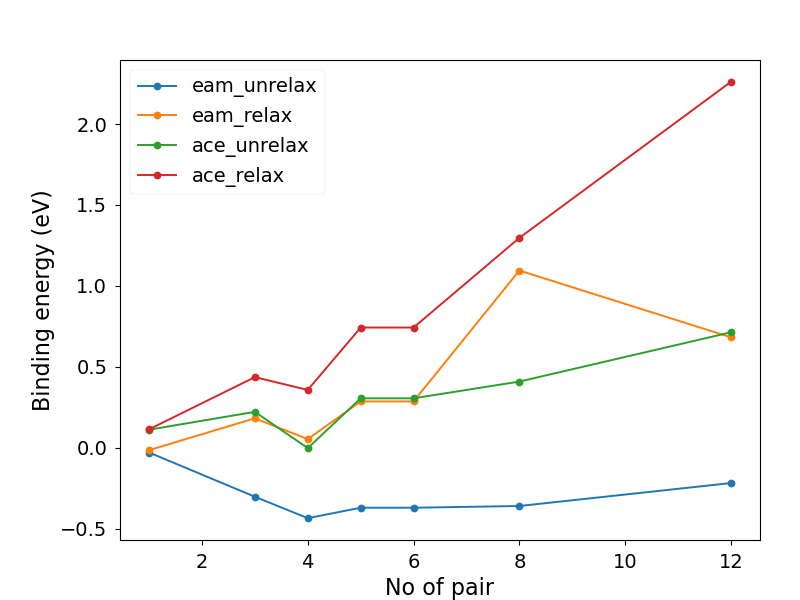

In [48]:
%matplotlib notebook
graph_init()
for key in ['eam','ace']:
    for i in ['unrelax','relax']:
        if i == 'unrelax':
            plt.plot(myresults[key]['X'],myresults[key]['divac_e_ur'],'-o',label='{}_{}'.format(key,i))
        if i == 'relax':
            plt.plot(myresults[key]['X'],myresults[key]['divac_e_r'],'-o',label='{}_{}'.format(key,i))
        plt.xlabel("No of pair")
        plt.ylabel("Binding energy (eV)")

        plt.subplots_adjust(left=0.15,
                            bottom=0.1, 
                            right=0.95, 
                            top=0.90, 
                            wspace=0.05, 
                            hspace=0.05)
        plt.legend()


In [49]:
np.save('cluster_S4.npy',myresults)
test1=np.load('cluster_S4.npy',allow_pickle='TRUE')
test1

array({'eam': {'divac_e_ur': [-0.02970736133227092, -0.3029591888938512, -0.4354764761305887, -0.37090368980477706, -0.37090368980500443, -0.36019949532908413, -0.218497497272665], 'divac_e_r': [-0.015135159052647396, 0.1816463629604641, 0.05288135538773986, 0.2860260938526835, 0.28602609385256983, 1.0951454143054207, 0.6824377728042919], 'divac_f_ur': [1.568022013944642, 2.3358036486531546, 3.14593575580966, 3.0813629694838482, 3.0813629694840756, 3.748273594927923, 4.284186416791272], 'divac_f_r': [1.370364798892183, 1.8511980967988393, 2.6575779242913313, 2.4244331858263877, 2.4244331858265014, 2.2929286852934183, 3.383251146714315], 'Ef_ur': 0.6776148199197678, 'Ef_r': 0.6776148199197678, 'X': [1, 3, 4, 5, 6, 8, 12]}, 'ace': {'divac_e_ur': [0.11134947253003702, 0.22166636686597485, -0.002472383775398157, 0.3052962040608236, 0.3052962040469538, 0.40870250045168177, 0.713136481103902], 'divac_e_r': [0.11379635310390768, 0.4360690810781307, 0.3570173547429931, 0.7427292494942321, 0.74

In [50]:
myresults2={}

for key in ['eam','ace']:
    myresults2[key]={}
    print(key)
    #cell.set_calculator(mycalc(key))
    Al_cell="./cluster_struc_S4_big/Al_{}.cfg".format(key)
    comp_cell=cfg.read_cfg(Al_cell)
    def relax(cell,fmax=1E-3,calc=mycalc(key),runing=True):
        cell.set_calculator(calc)
        rlx=FIRE(cell)
        if runing:
            rlx.run(fmax=fmax) 
        return(cell.get_potential_energy())
    E_0_relax = relax(comp_cell,fmax=0.001,runing=True)
    E_0 = relax(comp_cell,fmax=0.001,runing=False)
    #cells=create_cells(cell)
    exec(f'cell1 = cell_{key}')
    cell1.pop(0)
    divacancy_energies_unrelax=[]
    divacancy_energies_relax=[]
    divacancy_formation_unrelax = []
    divacancy_formation_relax = []
    folders = ['./cluster_struc_S4_big/13_{}.cfg'.format(key)]
    atom = [12]
    for i, j in zip(folders, atom):
        initial_cell= i
        cell_base=cfg.read_cfg(initial_cell)
        E_f_1 = relax(cell1,fmax=0.001,runing=False) - ((N-1) * E_0/N)
        E_f_2 = relax(cell1,fmax=0.001,runing=True) - (N-1) * E_0_relax/N
        d_f_ur = ( relax(cell_base,fmax=0.001,runing=False) - ((N-j) * E_0/N) )
        d_f_r = ( relax(cell_base,fmax=0.001,runing=True) - ((N-j) * E_0_relax/N) )
        divacancy_energies_unrelax.append( j*E_f_1 - d_f_ur )
        divacancy_energies_relax.append( j*E_f_2 - d_f_r )
        divacancy_formation_unrelax.append(d_f_ur)
        divacancy_formation_relax.append(d_f_r)
    myresults2[key]['divac_13_e_ur']=divacancy_energies_unrelax
    myresults2[key]['divac_13_e_r']=divacancy_energies_relax
    myresults2[key]['divac_13_f_ur']=divacancy_formation_unrelax
    myresults2[key]['divac_13_f_r']=divacancy_formation_relax
    myresults2[key]['Ef_13_ur']=E_f_1
    myresults2[key]['Ef_13_r']=E_f_2


#print(a0,E_0)
print('unrelax',divacancy_energies_unrelax)
print('relax',divacancy_energies_relax)

eam
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:55:48     -860.159997*       0.0000
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:55:48     -851.980215*       0.2826
FIRE:    1 09:55:48     -851.986939*       0.2697
FIRE:    2 09:55:48     -851.999046*       0.2448
FIRE:    3 09:55:48     -852.014165*       0.2093
FIRE:    4 09:55:48     -852.029448*       0.1658
FIRE:    5 09:55:48     -852.042262*       0.1182
FIRE:    6 09:55:48     -852.050903*       0.0747
FIRE:    7 09:55:48     -852.055201*       0.0531
FIRE:    8 09:55:48     -852.056460*       0.0673
FIRE:    9 09:55:48     -852.056751*       0.0660
FIRE:   10 09:55:48     -852.057311*       0.0633
FIRE:   11 09:55:48     -852.058100*       0.0595
FIRE:   12 09:55:48     -852.059060*       0.0545
FIRE:   13 09:55:48     -852.060122*       0.0485
FIRE:   14 09:55:48     -852.061213*       0.0417


/home/eliza/.local/lib/python3.8/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 09:55:53     -934.482360*       0.1424
FIRE:    1 09:55:55     -934.485462*       0.1354
FIRE:    2 09:55:56     -934.491086*       0.1225
FIRE:    3 09:55:57     -934.498207*       0.1050
FIRE:    4 09:55:58     -934.505588*       0.0833
FIRE:    5 09:56:00     -934.512068*       0.0587
FIRE:    6 09:56:01     -934.516830*       0.0444
FIRE:    7 09:56:02     -934.519607*       0.0328
FIRE:    8 09:56:03     -934.520714*       0.0316
FIRE:    9 09:56:05     -934.520805*       0.0309
FIRE:   10 09:56:06     -934.520980*       0.0297
FIRE:   11 09:56:07     -934.521225*       0.0278
FIRE:   12 09:56:09     -934.521520*       0.0255
FIRE:   13 09:56:10     -934.521842*       0.0226
FIRE:   14 09:56:11     -934.522168*       0.0194
FIRE:   15 09:56:12     -934.522474*       0.0159
FIRE:   16 09:56:14     -934.522766*       0.0120
FIRE:   17 09:56:15     -934.523012*       0.0084
FI

In [51]:
np.save('cluster_S4_13.npy',myresults2)
test2=np.load('cluster_S4_13.npy',allow_pickle='TRUE')
test2

array({'eam': {'divac_13_e_ur': [46.388366721585044], 'divac_13_e_r': [45.67336941078531], 'divac_13_f_ur': [11.449021646554684], 'divac_13_f_r': [11.090882855502855], 'Ef_13_ur': 4.819782364011644, 'Ef_13_r': 4.730354355524014}, 'ace': {'divac_13_e_ur': [45.78429416279846], 'divac_13_e_r': [48.069333925034016], 'divac_13_f_ur': [11.397189854803173], 'divac_13_f_r': [8.614119271980371], 'Ef_13_ur': 4.765123668133469, 'Ef_13_r': 4.723621099751199}},
      dtype=object)